In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

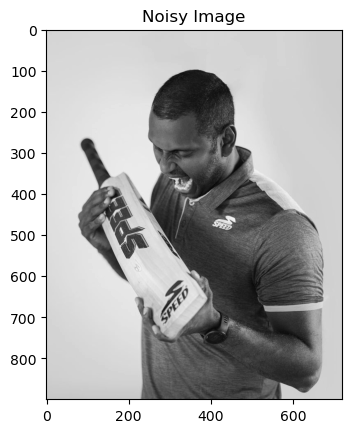

In [2]:
# Load the noisy image
noisy_image = cv2.imread('img4.jpg', 0)  # Load as grayscale
plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
plt.show()

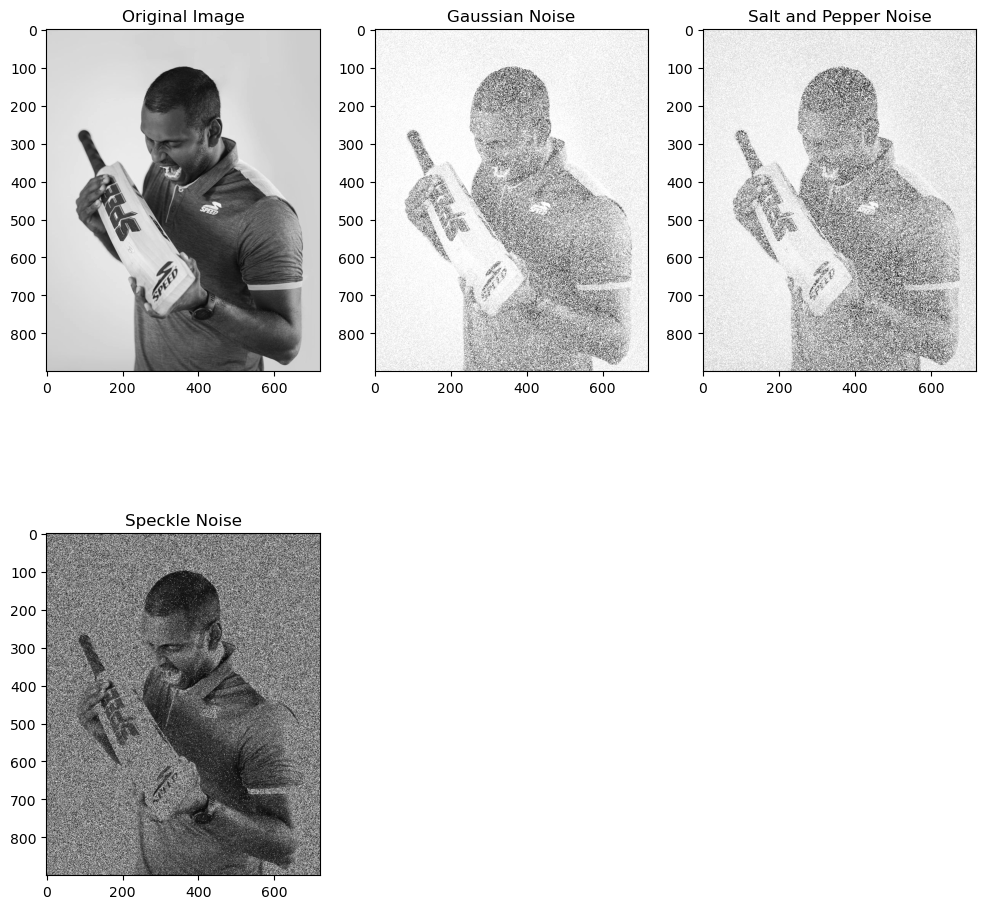

In [3]:
# Add different types of noise to the image
# Example: Gaussian, Salt-and-Pepper, Speckle

gaussian_noise = np.random.normal(0, 30, noisy_image.shape).astype(np.uint8)
noisy_image_with_gaussian = cv2.add(noisy_image, gaussian_noise)

salt_and_pepper = np.random.randint(0, 2, noisy_image.shape) * 255
salt_and_pepper_noise = np.zeros_like(noisy_image)
salt_and_pepper_noise[salt_and_pepper == 255] = 255
noisy_image_with_salt_and_pepper = cv2.add(noisy_image, salt_and_pepper_noise)

speckle = noisy_image + noisy_image * 0.5 * np.random.randn(*noisy_image.shape)
noisy_image_with_speckle = speckle.astype(np.uint8)

# plot the images
plt.figure(figsize=(12, 12))

plt.subplot(231), plt.imshow(noisy_image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(noisy_image_with_gaussian, cmap='gray'), plt.title('Gaussian Noise')
plt.subplot(233), plt.imshow(noisy_image_with_salt_and_pepper, cmap='gray'), plt.title('Salt and Pepper Noise')
plt.subplot(234), plt.imshow(noisy_image_with_speckle, cmap='gray'), plt.title('Speckle Noise')
plt.show()

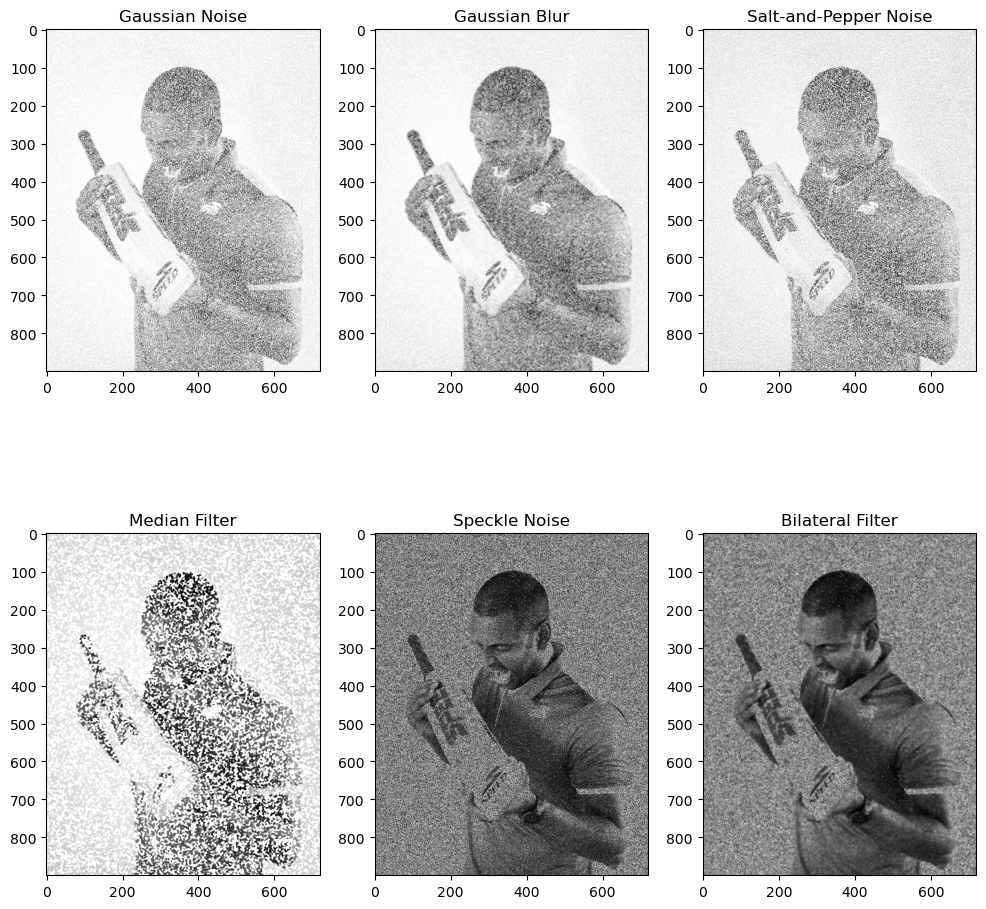

In [4]:
# Apply noise reduction techniques
# Gaussian Noise Reduction using Gaussian Blur
gaussian_blur = cv2.GaussianBlur(noisy_image_with_gaussian, (5, 5), 0)

# Salt-and-Pepper Noise Reduction using Median Filter
median_filtered = cv2.medianBlur(noisy_image_with_salt_and_pepper, 5)

# Speckle Noise Reduction using Bilateral Filter
bilateral_filtered = cv2.bilateralFilter(noisy_image_with_speckle, 9, 75, 75)

# Display the images using Matplotlib
plt.figure(figsize=(12, 12))

plt.subplot(2, 3, 1), plt.imshow(noisy_image_with_gaussian, cmap='gray'), plt.title('Gaussian Noise')
plt.subplot(2, 3, 2), plt.imshow(gaussian_blur, cmap='gray'), plt.title('Gaussian Blur')
plt.subplot(2, 3, 3), plt.imshow(noisy_image_with_salt_and_pepper, cmap='gray'), plt.title('Salt-and-Pepper Noise')
plt.subplot(2, 3, 4), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filter')
plt.subplot(2, 3, 5), plt.imshow(noisy_image_with_speckle, cmap='gray'), plt.title('Speckle Noise')
plt.subplot(2, 3, 6), plt.imshow(bilateral_filtered, cmap='gray'), plt.title('Bilateral Filter')
plt.show()